# Racetrack, 5.12 Sutton Bartow

- Vx and Vy are both >=0  and have maximum value 5
- Grid World
    - Start state: Any point on the bottom (X0, 0)
        - NOTE: X0 is a linearly spaced negative range of integers without gaps
    - Goal State: Any point in the top right where (0, Yg)
        -- NOTE: Y0 is a linearly spaced positive range of integers without gaps
    - Track: Legal move
    - Out of bounds: Reset velocities and new random start position, continue the episode
    - Constant -1 reward until car reaches finish line
    - BEFORE EACH MOVE IS APPLIED...
        - check to see if projected path intersects with any of the following: [boundary, finish line, racetrack]

- EXTRA CHALLENGE: All points have random chance of returning velocity incremints of 0 regardless of the choice made by the agent (Brake failure or failed acceleration or intended coasting)
- Apply Monte Carlo control method to this task to compute the optimal policy from each staring state
- Exhibit several trajectories folliwng the optimal policy but turn the noise off for those... WTF?


# Policy
- on-policy MC methods are soft 
# World 


# Episode Generation

# Value Function Estimation

# Return Calculation

# Policy Improvement

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

import os
import imageio
import random
pd.options.display.max_columns = None

%matplotlib inline

# Enviroment

# The Track(s)

In [2]:
# credit for hardcoding this arrays: https://github.com/laxatives/rl/blob/master/racetrack_monte_carlo.ipynb
track_a_coords = np.array([
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
])
track_b_coords = np.array([
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],     
    [0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],     
    [0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1], 
    [0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1], 
    [0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1], 
    [0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1], 
    [0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1], 
    [0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1], 
    [0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1], 
    [0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],     
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0], 
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0], 
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0], 
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0], 
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0],     
    [0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0],    
    [0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0],    
    [0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0],    
    [0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0],    
    [0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0],   
    [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0],     
    [0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0],     
    [0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0],     
    [0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0],     
    [0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0],     
    [0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0],     
    [0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0],    
    [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0],    
    [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0],
    [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0],    
    [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0],
])


In [3]:
# [(track_a_coords.shape[1] - 1, y) for y, val in enumerate(track_a_coords[:,-1]) if val > 0] # goals
# literally the root my hours of probleems was that I used the height instead of width to set the goal positions
[(x, track_a_coords.shape[0] - 1) for x, val in enumerate(track_a_coords[-1]) if val > 0] # starts

[(3, 31), (4, 31), (5, 31), (6, 31), (7, 31), (8, 31)]

In [4]:
# track class object
class Racetrack:
    def __init__(self, track_coords):
        self.track_coords = track_coords  # 2D numpy array representing the track
        self.height, self.width = track_coords.shape  # Dimensions of the track
         # Legal start positions: any '1' in the last row (bottom)
        self.start_positions = [(x, self.height - 1) for x, val in enumerate(self.track_coords[-1]) if val > 0]
        
        # Legal goal positions: any '1' in the last column (rightmost column)
        self.goal_positions = [(self.width - 1, y) for y, val in enumerate(self.track_coords[:, -1]) if val > 0]
 
    def is_legal_position(self, col, row):
        """Check if the given position is within bounds and legal (a '1' in track_coords)."""
        # Ensure row and col are within bounds, and check if the track value is 1 (legal position)
        if 0 <= row < self.height and 0 <= col < self.width:
            return self.track_coords[row, col] == 1
        return False

    def plot_track(self, driver_position=None, step_count= None,save_path=None):
        """Plots the racetrack and highlights the driver's position."""
        plt.figure(figsize=(8, 8))
        # Display the racetrack grid using imshow (with '1' for track shown in white and '0' for off-track in black)
        plt.imshow(self.track_coords, cmap="gray_r", origin="upper")
        
        # If driver's position is given, highlight it with a red square
        if driver_position:
            col, row = driver_position[0], driver_position[1] 
            plt.scatter(col, row, color="red", s=100, label="Driver")

        # Optional: Add grid lines for better visibility
        plt.grid(True, color='black', linewidth=0.5)
        plt.xticks(np.arange(self.width))
        plt.yticks(np.arange(self.height))
        plt.gca().set_xticks(np.arange(-.5, self.width, 1), minor=True)
        plt.gca().set_yticks(np.arange(-.5, self.height, 1), minor=True)
        plt.gca().grid(which="minor", color="black", linestyle='-', linewidth=0.5)

        # Labels and title
        # Title and step count
        if step_count is not None:
            plt.title(f"Step: {step_count}")
        
       # Show plot or save it
        if save_path:
            plt.savefig(save_path)  # Save the image to file
            plt.close()  # Close the plot to avoid displaying it in interactive mode
        else:
            plt.show()

class Driver:
    def __init__(self, racetrack):
        self.racetrack = racetrack
        self.position = random.choice(self.racetrack.start_positions)  # Start from a random valid position
        self.velocity = (0, 0)  # Start with 0 velocity
        self.actions = [(-1, -1), (-1, 0), (-1, 1),
                        (0, -1),  (0, 0),  (0, 1),
                        (1, -1),  (1, 0),  (1, 1)]  # Define actions: deltas for (Vx, Vy)
        self.Vx_min, self.Vx_max = -5, 5
        self.Vy_min, self.Vy_max = -5, 5

    def apply_action(self, action):
        """Applies the chosen action and updates the agent's position and velocity in one jump."""
        col, row = self.position  # row = y (vertical), col = x (horizontal)
        Vx, Vy = self.velocity
        delta_Vx, delta_Vy = action
        
        # Apply slippage: With 10% probability, both velocity increments are set to 0
        if random.uniform(0, 1) < 0.1:  # 10% chance for slippage
            delta_Vx, delta_Vy = 0, 0

        # Update velocities with the action and clamp within [-5, 5]
        new_Vx = max(self.Vx_min, min(self.Vx_max, Vx + delta_Vx))
        new_Vy = max(self.Vy_min, min(self.Vy_max, Vy + delta_Vy))

        # Update position based on new velocities (single jump)
        new_col = col + new_Vx
        new_row = row + new_Vy

        # Check if the final position is within bounds and legal
        if self.racetrack.is_legal_position(new_col, new_row):
            # Update position and velocity if the move is legal
            self.position = (new_col, new_row)
            self.velocity = (new_Vx, new_Vy)
            reward = -1  # Step penalty 
        else:
            # Reset to a random start position if the move is illegal
            self.position = random.choice(self.racetrack.start_positions)
            self.velocity = (0, 0)
            reward = -1  # Penalize for illegal action

        # Check for reaching the goal state
        if self.position in self.racetrack.goal_positions:
            reward = 100  # Reward for reaching the goal

        # Return the new position, reward, and a flag indicating if the goal was reached
        return self.position, reward, (self.position in self.racetrack.goal_positions)

    def reset(self):
        """Reset the agent to a random start position and zero velocity."""
        self.position = random.choice(self.racetrack.start_positions)
        self.velocity = (0, 0)

# The Agent

In [5]:
# Monte Carlo Control Method


class MonteCarloAgent:
    def __init__(self, racetrack, epsilon=0.1, gamma = 1.0):
        self.racetrack = racetrack
        self.epsilon = epsilon  # Exploration rate
        self.gamma = gamma
        self.Q = {}  # Q-table to store state-action values
        self.policy = {}  # Policy for action selection
        self.actions = [(-1, 0), (-1, 1), (-1, -1),
                        (0, -1),  (0, 0),  (0, 1),
                        (1, -1),  (1, 0),  (1, 1)]
        self.Vx_min, self.Vx_max = -5, 5
        self.Vy_min, self.Vy_max = -5, 5
        self.returns = {}  # To store returns for each state-action pair
        self.initialize_Q()

    def initialize_Q(self):
        """Initialize Q-values for all legal state-action pairs."""
        for col in range(self.racetrack.width):
            for row in range(self.racetrack.height):
                if self.racetrack.is_legal_position(col, row):
                    for Vx in range(self.Vx_min, self.Vx_max + 1):
                        for Vy in range(self.Vy_min, self.Vy_max + 1):
                            state = ((col, row), (Vx, Vy))
                            # Initialize Q-value with random values for each action
                            self.Q[state] = {action: 10 for action in self.actions}
                            # Initialize policy to a random action
                            self.policy[state] = random.choice(self.actions)
                            # Initialize returns as an empty list for each state-action pair
                            self.returns[state] = {action: [] for action in self.actions}

    def choose_action(self, state):
        """Select an action using epsilon-greedy policy."""
        if random.uniform(0, 1) < self.epsilon:
            # Explore: choose a random action
            return random.choice(self.actions)
        else:
            # Exploit: choose the best action from Q-values
            if state not in self.Q:
                self.Q[state] = {action: 0 for action in self.actions}
        
        # Return the action with the maximum Q-value for the given state
        return max(self.Q[state], key=self.Q[state].get)

    def update_policy(self, state):
        """Update the policy to be greedy with respect to the updated Q-values."""
        self.policy[state] = max(self.Q[state], key=self.Q[state].get)

    def reset(self):
        """Reset the Q-values and policy."""
        self.Q.clear()
        self.policy.clear()
        self.returns.clear()
        self.initialize_Q()

    def update_Q_and_policy(self, episode):
        """Update the Q-values and policy based on an episode."""
        G = 0  # Initialize the return (sum of rewards)
        visited_state_action_pairs = set()

        # Iterate over the episode backwards to accumulate rewards
        for t in reversed(range(len(episode))):
            state, action, reward = episode[t]

            # Accumulate return G (no discount factor, G is just the sum of rewards)
            G = self.gamma*G + reward

            # First-visit check: if (state, action) has already been seen in this episode, skip it
            if (state, action) not in visited_state_action_pairs:
                visited_state_action_pairs.add((state, action))
                # Initialize the returns dictionary if state or action is not present
                if state not in self.returns:
                    self.returns[state] = {}

                if action not in self.returns[state]:
                    self.returns[state][action] = []
                # Initialize Q-value for the state-action pair if not already present
                if state not in self.Q:
                    self.Q[state] = {}

                if action not in self.Q[state]:
                    self.Q[state][action] = 0.0  # Initialize to 0.0 or some default value
               # Append G (the return) to the list of returns for this (state, action)

                self.returns[state][action].append(G)

                # Update the Q-value as the average of all returns for this (state, action) pair
                self.Q[state][action] = np.mean(self.returns[state][action])

                # Update the policy to be greedy (choose the action with the highest Q-value for this state)
                self.update_policy(state)

    def run_episode(self, driver, plot_episode=False, gif_filename='racetrack_simulation.gif'):
        """Run an episode and optionally generate a GIF of the episode."""
        total_reward = 0
        steps = 0
        episode = []
        state = driver.reset()  # Reset the driver to the start position
        done = False
        images = []  # To store image paths if plotting
        while steps < 500:
            action = self.choose_action(state)
            next_state, reward, done = driver.apply_action(action)
            total_reward += reward
            
            episode.append((state, action, reward))
            position = next_state[0:]
            # Plot and save if plotting is enabled
            if plot_episode:
                if steps <100:
                    save_path = f"imgs/step_{steps}.png"
                    driver.racetrack.plot_track(driver_position=position, step_count=steps, save_path=save_path)
                    images.append(save_path)
            steps += 1
            if done:
                break

            state = next_state

        # If plotting was enabled, create a GIF and clean up the images
        if plot_episode:
            self.create_gif(images, gif_filename)
            self.cleanup_images(images)

        return episode, total_reward, steps

    def create_gif(self, image_files, output_filename='racetrack_simulation.gif', duration=0.1):
        """Create a GIF from a list of image files."""
        with imageio.get_writer(output_filename, mode='I', duration=duration) as writer:
            for filename in image_files:
                image = imageio.imread(filename)
                writer.append_data(image)
        print(f"GIF saved as {output_filename}")

    def cleanup_images(self, image_files):
        """Delete image files used to create the GIF."""
        for filename in image_files:
            try:
                os.remove(filename)
            except OSError as e:
                print(f"Error deleting file {filename}: {e}")


In [6]:
def train_monte_carlo(agent, driver, num_episodes=5000, epsilon_decay=0.999):
    """Train the agent using on-policy first-visit Monte Carlo control with epsilon decay and track performance."""
    total_rewards = []  # List to keep track of total rewards for each episode
    success_rates = []  # List to keep track of success rates over time
    successful_episodes = 0  # Counter for successful episodes

    for episode_num in range(num_episodes):
        # Decay epsilon to reduce exploration over time
        agent.epsilon = max(0.01, agent.epsilon * epsilon_decay)  # Keep epsilon above 0.01
        if episode_num % 1000 ==0:
            print("Running a single episode and generating a plot...")
            episode, total_reward, steps = agent.run_episode(driver, plot_episode=True, gif_filename=f'episode{episode_num}_slippage_simulationb.gif')
        else:
            # Run an episode
            episode, total_reward, steps = agent.run_episode(driver)

            # Update Q-values and policy based on this episode
            agent.update_Q_and_policy(episode)

        total_rewards.append(total_reward)  # Store total reward for this episode

        # Count successful episodes (reaching the goal)
        if any(reward == 100 for _, _, reward in episode):  # Check if any reward is +100
            successful_episodes += 1

        # Calculate and store success rate
        success_rate = successful_episodes / (episode_num + 1) * 100  # Success rate so far
        success_rates.append(success_rate)

        # Optionally print progress
        if episode_num % 100 == 0:
            print(f"Episode {episode_num}/{num_episodes} | Reward: {total_reward} | Success Rate: {success_rate:.2f}%")
        

    # After training, plot results
    plot_training_results(total_rewards, success_rates)
    
def plot_training_results(rewards, success_rates, window_size=100):
    """Plot the rolling average rewards and success rates over episodes."""
    episodes = range(1, len(rewards) + 1)
    
    # Calculate rolling average for rewards
    rolling_avg_rewards = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')

    plt.figure(figsize=(12, 5))

    # Plot rolling average reward per episode
    plt.subplot(1, 2, 1)
    plt.plot(episodes[:len(rolling_avg_rewards)], rolling_avg_rewards, label=f"Rolling Average Reward (window={window_size})")
    plt.xlabel("Episodes")
    plt.ylabel("Average Reward")
    plt.title(f"Rolling Average Reward (Window Size = {window_size})")
    plt.grid(True)

    # Plot success rate over time
    plt.subplot(1, 2, 2)
    plt.plot(episodes, success_rates, label="Success Rate (%)", color='orange')
    plt.xlabel("Episodes")
    plt.ylabel("Success Rate (%)")
    plt.title("Success Rate over Time")
    plt.grid(True)

    # Show plots
    plt.tight_layout()
    plt.show()



Running a single episode and generating a plot...


C:\Users\seanh\AppData\Local\Temp\ipykernel_22012\2388549074.py:133: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


GIF saved as episode0_slippage_simulationb.gif
Episode 0/10000 | Reward: -500 | Success Rate: 0.00%
Episode 100/10000 | Reward: -500 | Success Rate: 5.94%
Episode 200/10000 | Reward: 28 | Success Rate: 28.86%
Episode 300/10000 | Reward: 49 | Success Rate: 48.50%
Episode 400/10000 | Reward: -11 | Success Rate: 60.60%
Episode 500/10000 | Reward: -246 | Success Rate: 67.86%
Episode 600/10000 | Reward: -500 | Success Rate: 72.71%
Episode 700/10000 | Reward: 59 | Success Rate: 76.03%
Episode 800/10000 | Reward: 42 | Success Rate: 78.40%
Episode 900/10000 | Reward: -27 | Success Rate: 80.80%
Running a single episode and generating a plot...
GIF saved as episode1000_slippage_simulationb.gif
Episode 1000/10000 | Reward: 89 | Success Rate: 82.62%
Episode 1100/10000 | Reward: 33 | Success Rate: 84.20%
Episode 1200/10000 | Reward: -103 | Success Rate: 85.51%
Episode 1300/10000 | Reward: 24 | Success Rate: 86.63%
Episode 1400/10000 | Reward: 16 | Success Rate: 87.58%
Episode 1500/10000 | Reward: 6

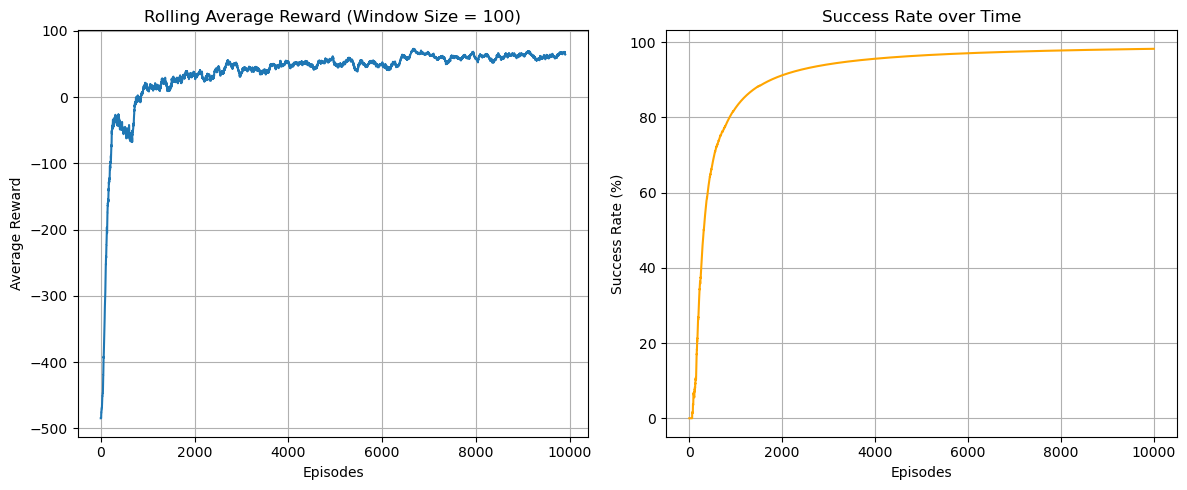

In [7]:
racetrack = Racetrack(track_b_coords)
driver = Driver(racetrack)
# Initialize the Monte Carlo agent
# .975 is not random but do some fabulously irrelevent back of the naapkin math considering the space
agent = MonteCarloAgent(racetrack, epsilon=0.1, gamma=.9)
train_monte_carlo(agent, driver, num_episodes=10000, epsilon_decay=.9999)

In [8]:
# tracka_big_picture
# tracka_big_picture_slippage
# trackb_big_picture
# trackb_big_picture_slippage